# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading the data

In [2]:
transactions_data = pd.read_csv('bank_transactions_data_2.csv')

In [3]:
transactions_data

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# 1. Exploratory data analysis

In [4]:
transactions_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [5]:
transactions_data.tail()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22
2511,TX002512,AC00009,243.08,2023-02-14 16:21:23,Credit,Jacksonville,D000215,59.127.135.25,M041,Online,24,Student,93,1,131.25,2024-11-04 08:07:49


In [6]:
transactions_data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [7]:
# printing all datatypes in the dataset

dataset_columns = transactions_data.columns

print('Data types:\n' + str(dataset_columns))

Data types:
Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


In [8]:
# printing all datatypes in the dataset

dataset_types = transactions_data.dtypes

print('Data types:\n' + str(dataset_types))

Data types:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [9]:
# printing all collumns unique count
transaction_data_unique = transactions_data.nunique()

transaction_data_unique

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [10]:
# finding all missing values in the dataset

missing_data = dataset_types.isnull().sum()

print('Missing values:\n' +  str(missing_data))

Missing values:
0


In [11]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

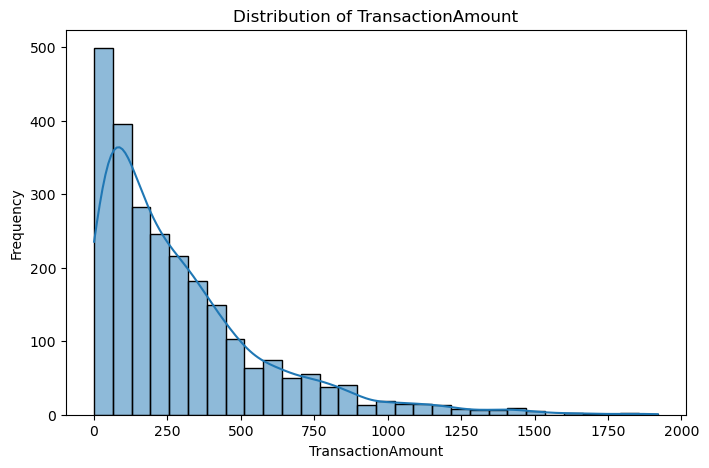

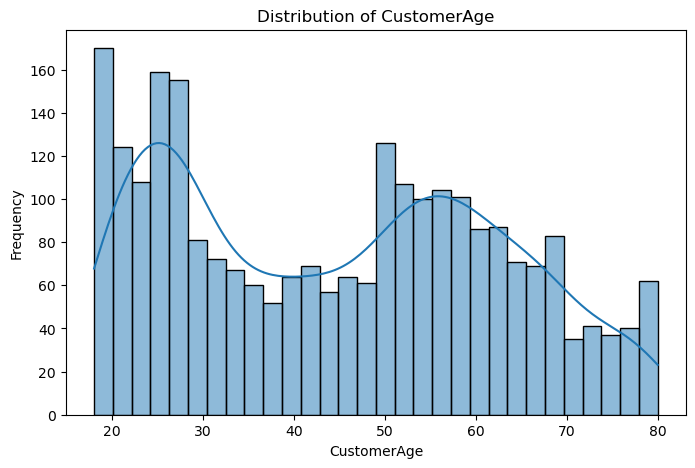

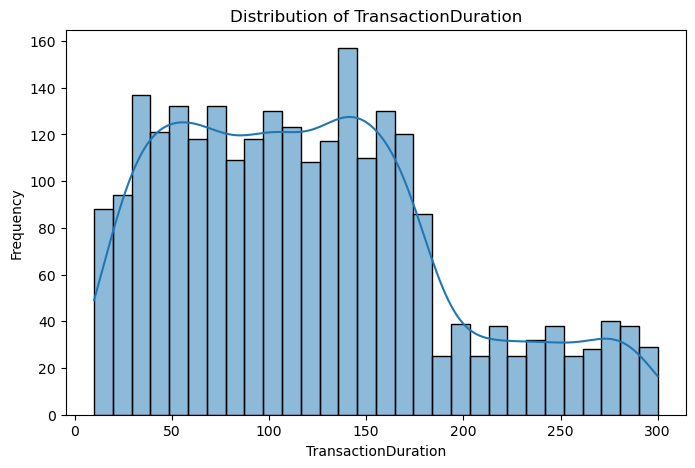

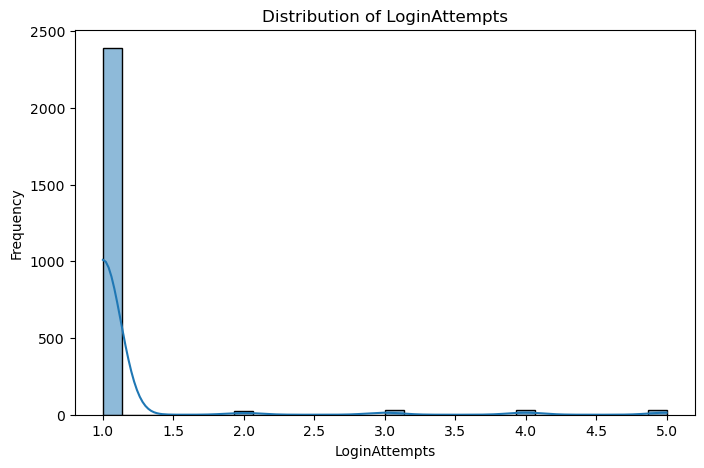

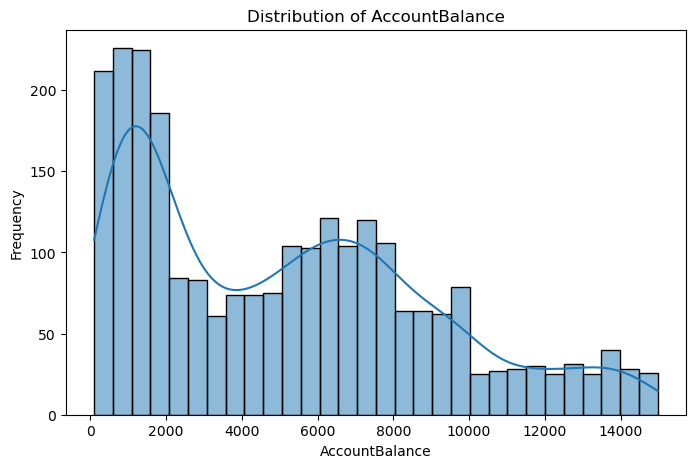

In [12]:
numerical_columns = transactions_data[['TransactionAmount', 'CustomerAge', 
                                       'TransactionDuration','LoginAttempts', 
                                       'AccountBalance']]

def plot_histograms(transactions_data, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        # Create a histogram with KDE
        sns.histplot(transactions_data[column], bins=30, kde=True)  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

plot_histograms(transactions_data, numerical_columns)    

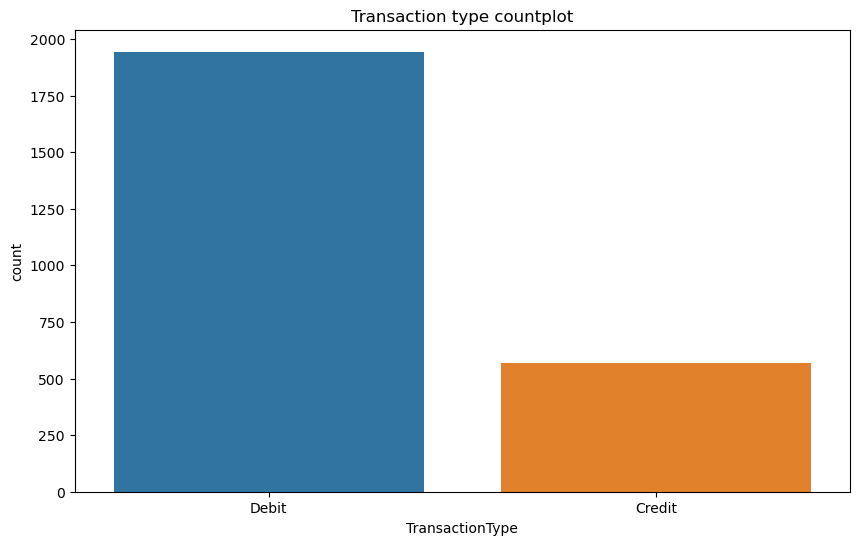

In [13]:
# function to present person age relationship

def TransactionTypeCount(data): 
    plt.figure(figsize=(10,6))
    sns.countplot(data=transactions_data, x='TransactionType')
    plt.title('Transaction type countplot')
    plt.show()
    
TransactionTypeCount(transactions_data)

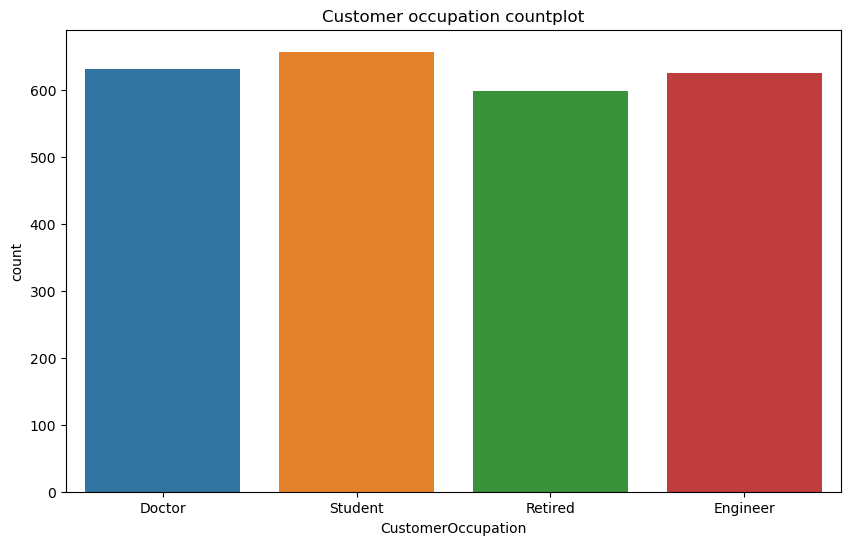

In [14]:
# function to present person age relationship

def OccupationCount(data): 
    plt.figure(figsize=(10,6))
    sns.countplot(data=transactions_data, x='CustomerOccupation')
    plt.title('Customer occupation countplot')
    plt.show()
    
OccupationCount(transactions_data)

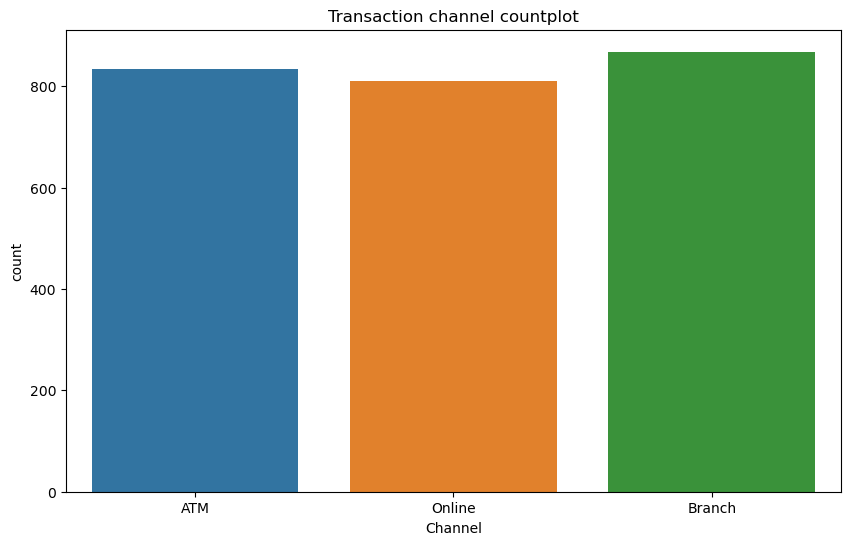

In [15]:
# function to present person age relationship

def ChannelCount(data): 
    plt.figure(figsize=(10,6))
    sns.countplot(data=transactions_data, x='Channel')
    plt.title('Transaction channel countplot')
    plt.show()
    
ChannelCount(transactions_data)

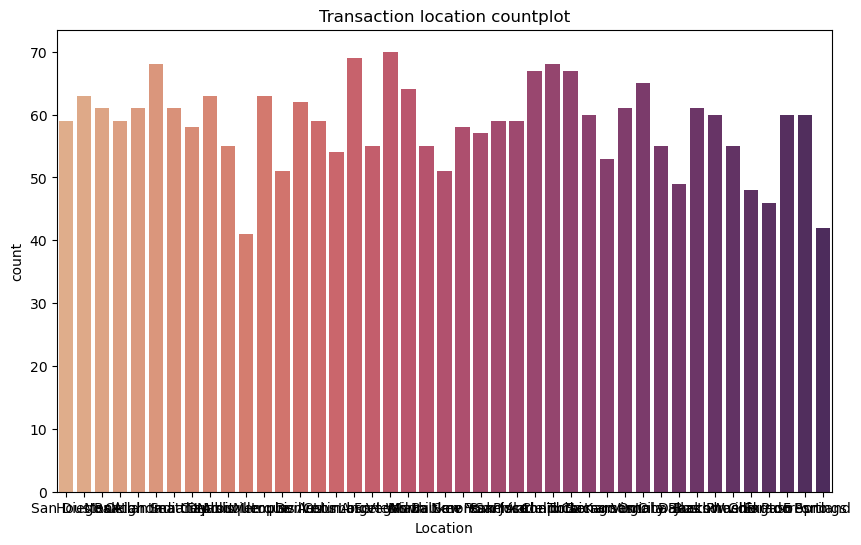

In [16]:
# function to present person age relationship

def LocationCount(data): 
    plt.figure(figsize=(10,6))
    sns.countplot(data=transactions_data, x='Location', palette='flare')
    plt.title('Transaction location countplot')
    plt.show()
    
LocationCount(transactions_data)

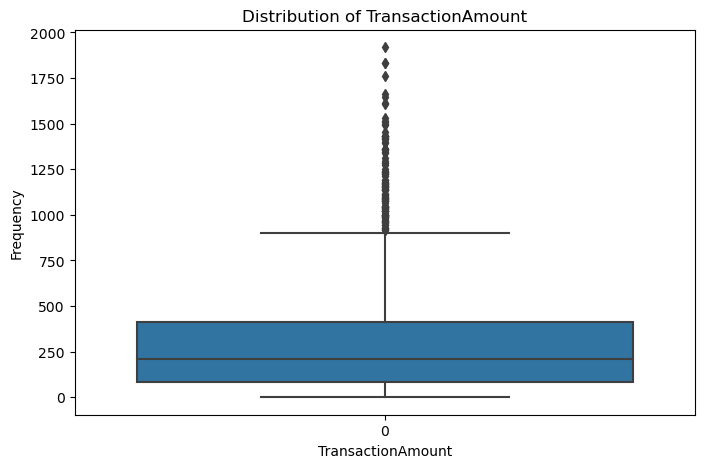

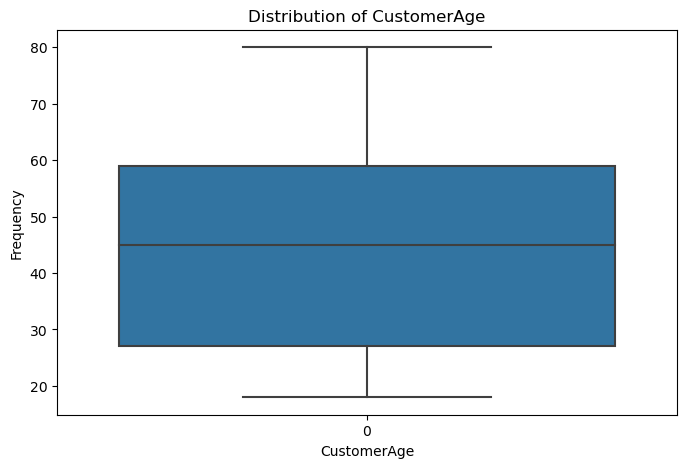

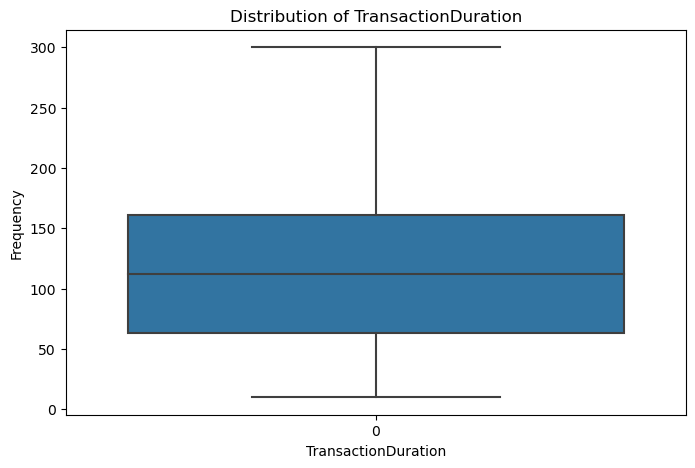

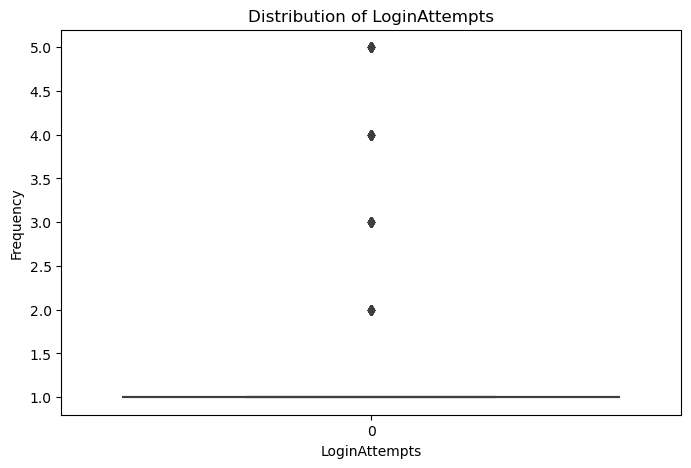

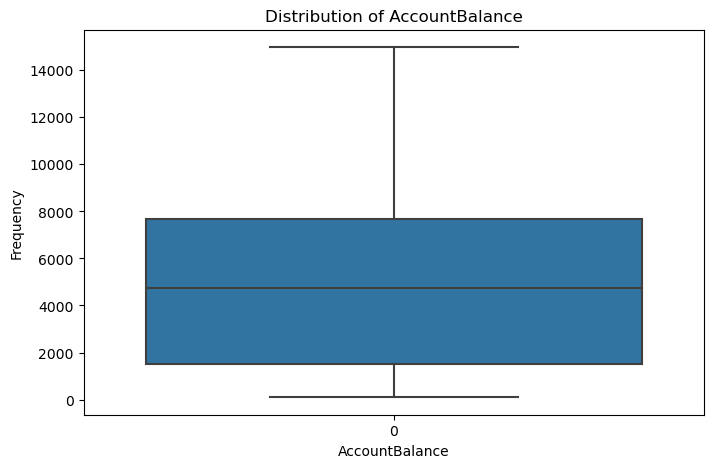

In [17]:
def BoxPlots(data):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(transactions_data[column])  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()    
    
    
BoxPlots(transactions_data)

# 2. Preprocessing 

## 2.1 Handling missing values

In [18]:
transactions_data.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

## 2.2 Encoding Categorical values

In [19]:
#print(transactions_data[numerical_columns].dtypes)
print(numerical_columns.dtypes)

TransactionAmount      float64
CustomerAge              int64
TransactionDuration      int64
LoginAttempts            int64
AccountBalance         float64
dtype: object


In [20]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['TransactionID', 'AccountID', 'TransactionDate',
                        'TransactionType', 'Location', 'DeviceID', 'IP Address', 
                        'MerchantID', 'Channel', 'CustomerOccupation', 
                        'PreviousTransactionDate']

encoder = LabelEncoder()

encoded_cat = transactions_data[categorical_features].apply(encoder.fit_transform)

transactions_encoded = pd.concat([transactions_data.drop(categorical_features, axis=1), encoded_cat], axis=1)

## 2.3 Normalising Numerical values

In [21]:
from sklearn.preprocessing import RobustScaler

numerical_features = ['TransactionAmount', 'CustomerAge', 
                                       'TransactionDuration','LoginAttempts', 
                                       'AccountBalance']

scaler = RobustScaler() 

# scaling all numerical features in the dataset
transactions_encoded[numerical_features] = scaler.fit_transform(transactions_encoded[numerical_features])

In [22]:
numerical_columns.dtypes


TransactionAmount      float64
CustomerAge              int64
TransactionDuration      int64
LoginAttempts            int64
AccountBalance         float64
dtype: object

In [23]:
transactions_encoded

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
0,-0.592378,0.78125,-0.321429,0.0,0.061009,0,126,684,1,36,365,186,14,0,0,105
1,0.496329,0.71875,0.290816,0.0,1.461410,1,450,1192,1,15,50,82,51,0,0,192
2,-0.255079,-0.81250,-0.576531,0.0,-0.585179,2,18,1276,1,23,229,343,8,2,3,41
3,-0.080086,-0.59375,-0.892857,0.0,0.620873,3,68,823,1,33,182,300,1,2,3,163
4,-0.594302,-0.59375,0.872449,0.0,0.436296,4,406,1959,0,1,298,501,90,2,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1.939229,-0.37500,-0.035714,0.0,1.288419,2507,293,772,0,7,605,325,71,1,0,305
2508,0.121452,0.09375,0.658163,0.0,-0.725694,2508,318,568,1,40,395,448,28,1,0,318
2509,-0.548667,0.34375,0.341837,0.0,-0.219064,2509,93,1547,1,36,93,474,86,1,2,136
2510,-0.075667,-0.68750,-0.954082,0.0,-0.479168,2510,116,379,1,10,614,326,40,2,3,358


## 2.4 Outlier detection

In [24]:
from sklearn.cluster import KMeans

# initialising k-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# fitting k-means on the dataset
kmeans.fit(transactions_encoded)

# Calculating distances to cluster centers
distances = np.linalg.norm(transactions_encoded - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# defining a threshold for outlier detection 
# distances greater than 2.5 standard deviations are considered outliers
threshold = np.mean(distances) + 2.5 * np.std(distances)

outliers = np.where(distances > threshold)[0]

numOutliers = len(outliers)

print(f"Outlier count: {numOutliers}")
print(f"Outlier indices: {outliers}")


Outlier count: 35
Outlier indices: [ 17  39  41  46  56  71  75  78  93 104 117 161 184 189 219 225 227 240
 244 249 252 254 278 282 326 341 446 539 549 556 577 586 595 601 638]


## 2.5 Outlier imputation

In [25]:
# from sklearn.impute import KNNImputer

# # copying features with outliers from the original dataset
# OutlierData = transactions_encoded[['TransactionAmount']].copy()

# # replacing all identified outliers with 'NaN'
# for index in outliers:
#     OutlierData.loc[index, ['TransactionAmount']] = np.nan 
    
# # defining KNN imputer as the iputation method
# imputer = KNNImputer(n_neighbors=5)

# # applying KNN imputation on the selected features
# data_imputed = imputer.fit_transform(OutlierData)

# # adding the imputed data back to the dataframe
# OutlierData_imputed = pd.DataFrame(data_imputed, columns=OutlierData.columns, index=OutlierData.index)

# # updating the original dataframe with the imputed values
# transactions_encoded.update(OutlierData_imputed)

### Outlier imputation check

In [26]:
# # checking if all outliers have been converted to 'NaN'
# print(OutlierData.loc[outliers])

In [27]:
# # Checking if all outliers with 'NaN' values have been imputed
# print(OutlierData_imputed.loc[outliers])

In [28]:
# # checking outlier count before imputation
# print(OutlierData.isnull().sum())

In [29]:
# # checking outlier count after imputation
# print(OutlierData_imputed.isnull().sum())

# 2.6 Feature selection

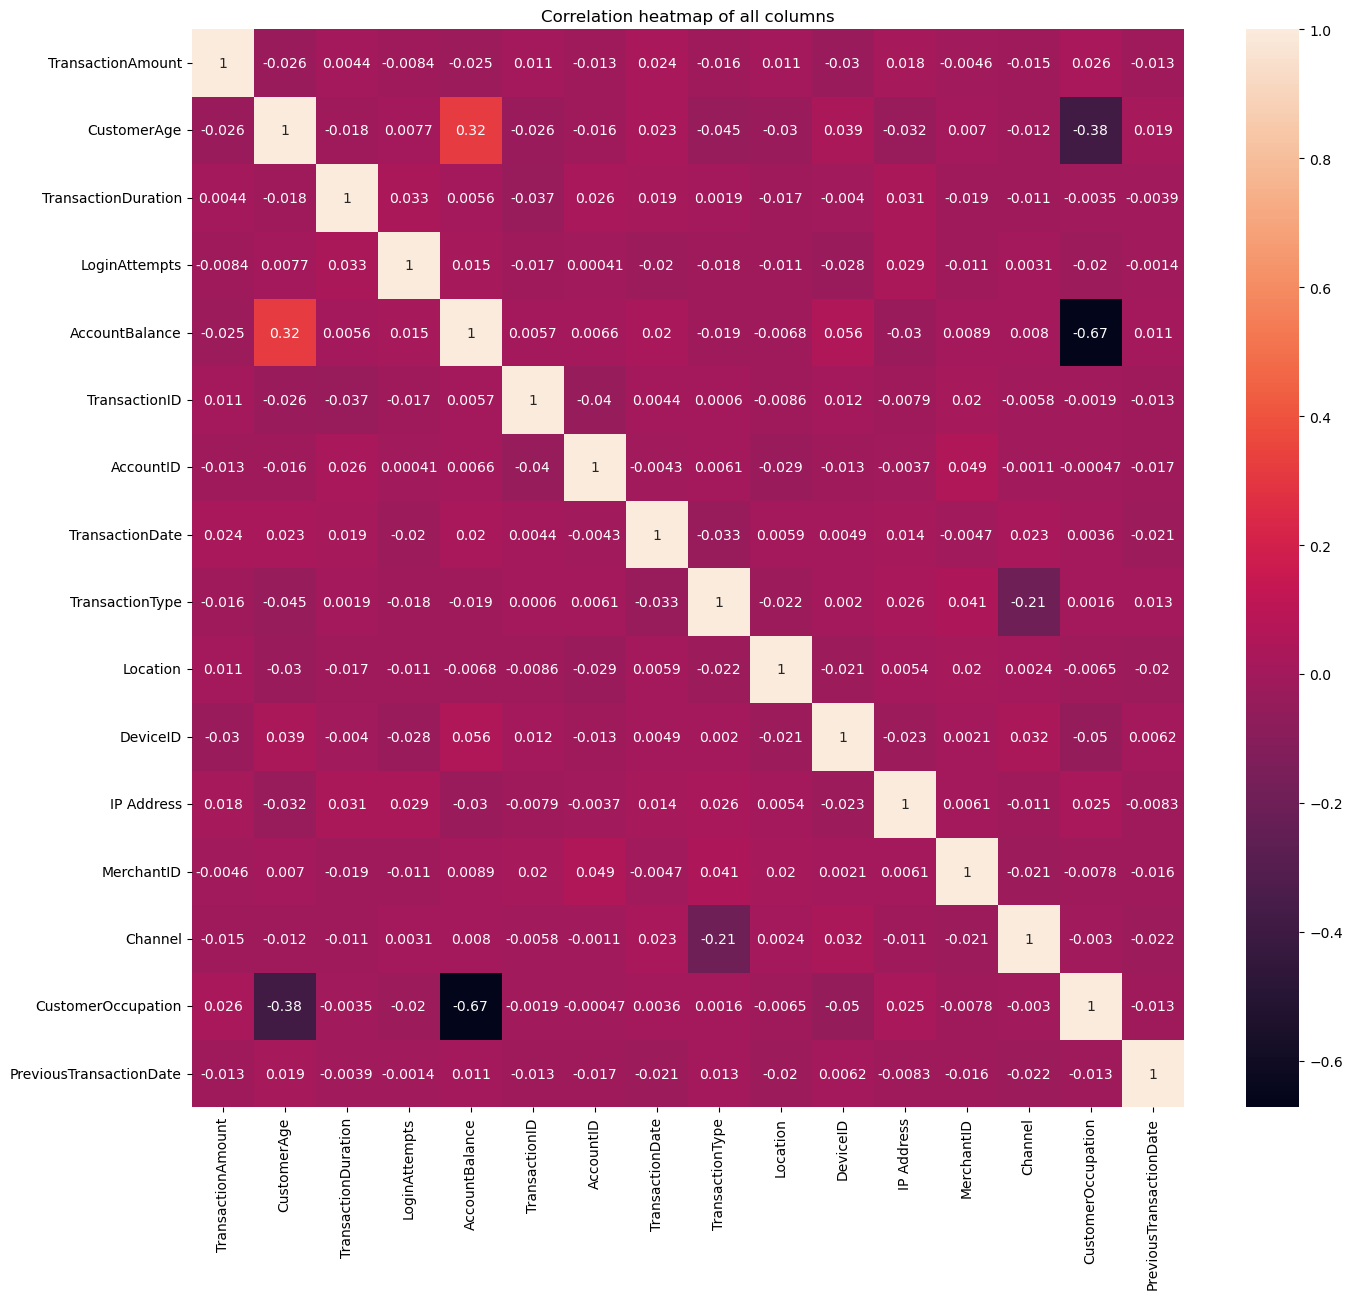

In [30]:
# Creating a heatmap visualising features correlation

def correlationHeatmap(data):
    plt.figure(figsize=(16,14))
    plt.title('Correlation heatmap of all columns')
    sns.heatmap(transactions_encoded.corr(), annot=True)
    plt.show()
    
correlationHeatmap(transactions_encoded)  

### Selected features

In [31]:
features = ['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']

x = transactions_encoded[features]

## Data split

In [32]:
from sklearn.model_selection import train_test_split

# setting a constant random state to choose the same data sample
random_state = 42

# performing a 70-15-15 split on the original dataset
x_train, x_temp = train_test_split(x, test_size=0.3, random_state=random_state)
x_val, x_test = train_test_split(x_temp, test_size=0.5, random_state=random_state)

# 3. Clustering

## 3.1 K-means clustering with PCA 

Explained variance by each component: [0.4587297  0.45413245]
Total variance explained: 0.913
Silhouette score: 0.4307704560253256


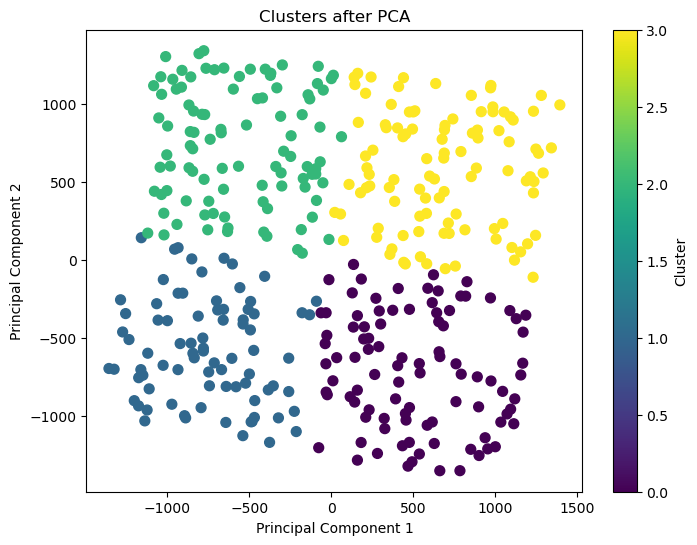

In [60]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# initialisaing PCA
pca = PCA(n_components=2) 

# fitting the PCA on train the dataset
x_train_pca = pca.fit_transform(x_train)

# fitting the PCA on train the dataset
x_test_pca = pca.transform(x_test)

# mapping the clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(x_test_pca)

# calculating the explained variance
explained_variance = pca.explained_variance_ratio_

# calculating the silhouette score
sil_score = silhouette_score(x_test_pca, clusters)

print(f"Explained variance by each component: {explained_variance}")
print(f"Total variance explained: {sum(explained_variance):.3f}")
print(f"Silhouette score: {sil_score}")

# creating cluster visualisation
plt.figure(figsize=(8, 6))
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

#### Elbow method to find principle components

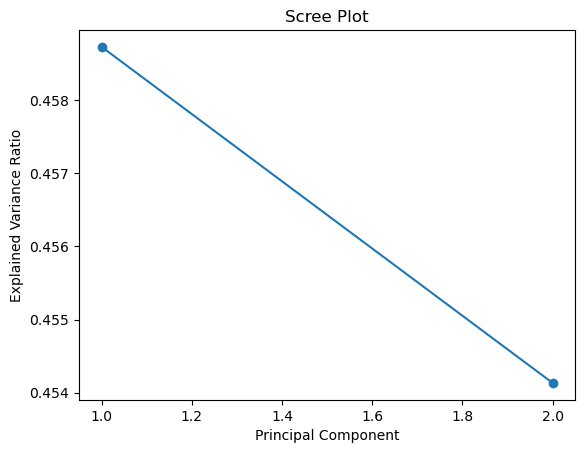

In [34]:

#bscree plot to visualise principle componenets
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

### PCA Loadings

In [35]:
# visuallsing the principle components created
pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
PC1,0.988442,-0.011132,0.000038,0.151120,-0.000003,0.000142,0.003534,-0.001425,-0.000239,-0.000024,-0.000018,0.000024,-0.000053,-0.000008,-0.000012,-0.002708
PC2,-0.151152,-0.000845,0.000014,0.988467,-0.000017,0.000302,0.006470,0.006383,-0.000388,0.000026,0.000031,-0.000025,0.000024,-0.000023,0.000031,-0.001816


## 3.2 DBSCAN clustering with PCA

Number of clusters found by DBSCAN: 19
Explained variance by each component: [0.4587297  0.45413245]
Total variance explained: 0.913
Silhouette Score: 0.11859563166008429


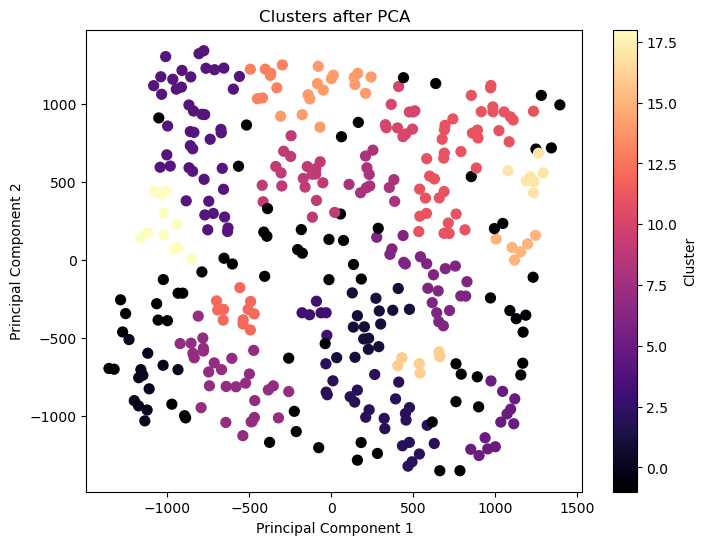

In [58]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# initialisaing PCA
pca = PCA(n_components=2) 

# fitting the PCA on the dataset
x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

# applying DBSCAN to the dataset
dbscan = DBSCAN(eps=150, min_samples=5)
clusters = dbscan.fit_predict(x_test_pca)

# calculating the explained variance
explained_variance = pca.explained_variance_ratio_

sil_score = silhouette_score(x_test_pca, clusters)

# the number of clusters found by DBSCAN
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

# printing clusters, explained variance and silhouette scores
print(f"Number of clusters found by DBSCAN: {n_clusters}")
print(f"Explained variance by each component: {explained_variance}")
print(f"Total variance explained: {sum(explained_variance):.3f}")
print(f"Silhouette Score: {sil_score}")

# creating cluster visualisation
plt.figure(figsize=(8, 6))
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=clusters, cmap='magma', s=50)
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Number of clusters found by DBSCAN: 19


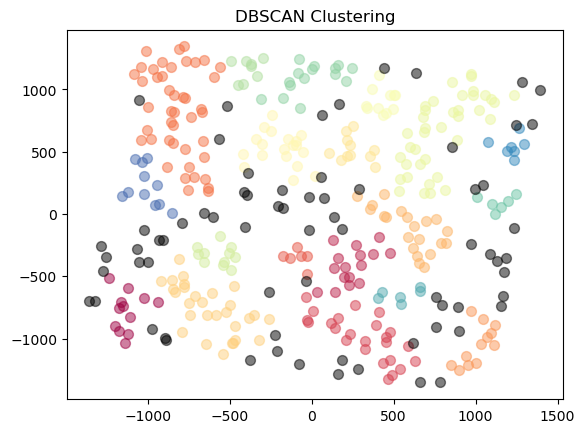

In [37]:
# model
dbscan = DBSCAN(eps=150, min_samples=5)
labels = dbscan.fit_predict(x_test_pca)

# the number of clusters found by DBSCAN
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")
                
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points (label=-1)
    class_member_mask = (labels == k)
    xy = x_test_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

plt.title('DBSCAN Clustering')
plt.show()

## 3.3 Fraud detection using K-Means

### Using the elbow method to find an appropriate k value

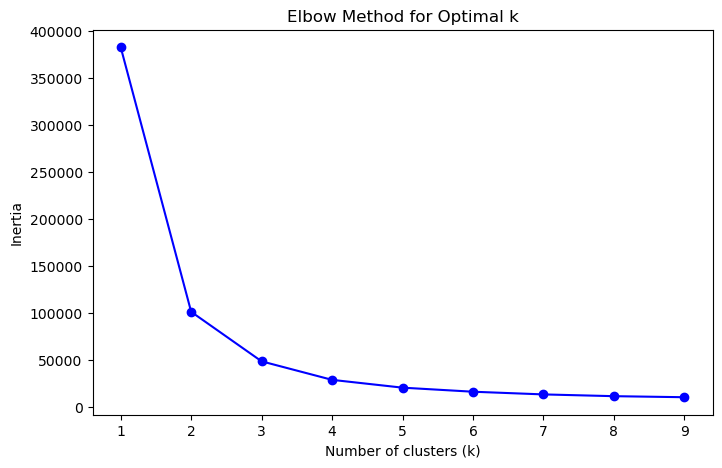

In [38]:
from sklearn.cluster import KMeans

# selecting features for fraud detetcion using k-means
features1 = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'TransactionType', 'AccountBalance', 'Location']

transactions_kmeans_data = transactions_encoded[features1].copy()

inertia = []
K = range(1, 10)  # Test for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 10)
    kmeans.fit(transactions_kmeans_data)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [39]:
# Ensure you work only with numeric features for clustering
numeric_features = transactions_kmeans_data.select_dtypes(include=[np.number]).columns
transactions_encoded_numeric = transactions_kmeans_data[numeric_features]

# initialising k-means
clustercount = 4

kmeans = KMeans(n_clusters = clustercount, random_state=42, n_init=10)

# fitting k-means on the dataset
kmeans_labels = kmeans.fit_predict(transactions_kmeans_data)

transactions_kmeans_data['KMeans_Cluster'] = kmeans_labels

n_clusters = len(kmeans_labels)

# Calculating distances to cluster centers
distances = np.linalg.norm(transactions_kmeans_data[numeric_features] - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# adding a column representing k-means distances in the dataset
transactions_kmeans_data['Kmeans_Distances'] = distances

# defining a threshold for outlier detection 
# distances greater than 2.0 standard deviations are considered outliers
threshold = np.mean(distances) + 2.0 * np.std(distances)

# adding a column representing wether a datapoint is a fraudulent point or not
transactions_kmeans_data['KMeans_Fraud'] = distances > threshold
fraud_summary = transactions_kmeans_data['KMeans_Fraud'].value_counts()
 
fraud_summary

KMeans_Fraud
False    2502
True       10
Name: count, dtype: int64

number of clusters created by kmeans: 4
KMeans_Fraud
False    2502
True       10
Name: count, dtype: int64


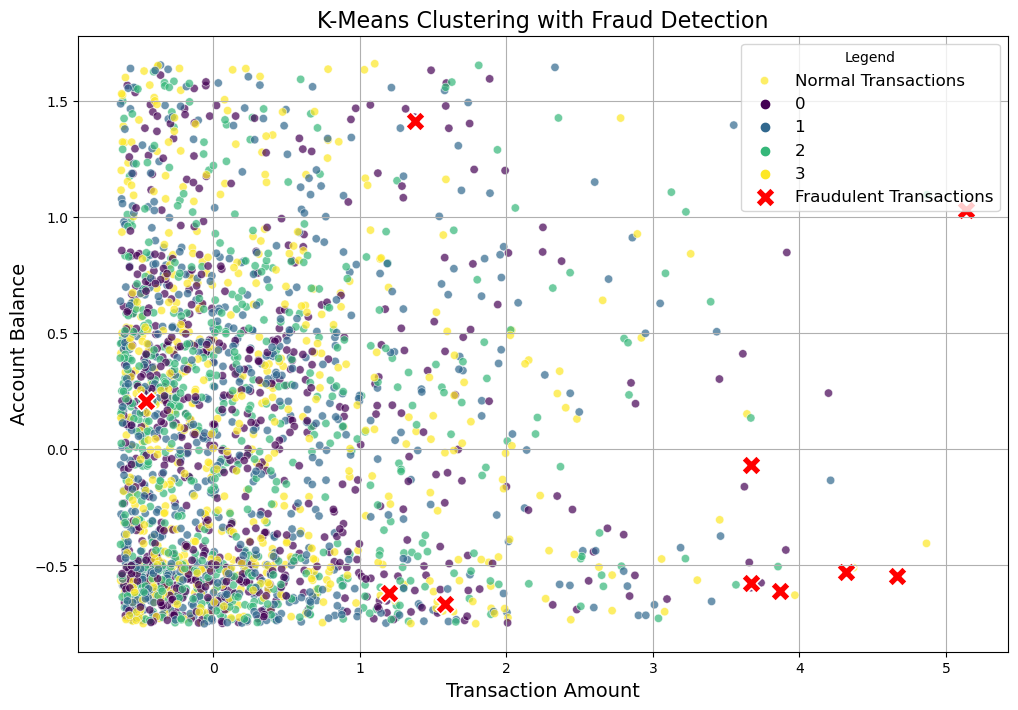

In [40]:
# defining fraud points (those with a KMeans_Fraud label True)
fraud_points = transactions_kmeans_data[transactions_kmeans_data['KMeans_Fraud'] == True]

# Defining normal points (those with a KMeans_Fraud label False)
normal_points = transactions_kmeans_data[transactions_kmeans_data['KMeans_Fraud'] == False]

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for normal transactions
sns.scatterplot(
    x='TransactionAmount', y='AccountBalance', 
    data=normal_points, hue='KMeans_Cluster', 
    palette='viridis', alpha=0.7, label='Normal Transactions'
)

# Scatter plot for fraud transactions
sns.scatterplot(
    x='TransactionAmount', y='AccountBalance', 
    data=fraud_points, color='red', marker='X', 
    s=200, label='Fraudulent Transactions'
)

print(f"number of clusters created by kmeans: {clustercount}")
print(fraud_summary)

plt.title('K-Means Clustering with Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)
plt.show()


# Fraud detection using DBSCAN

Number of clusters found by DBSCAN: 4
DBSCAN_Fraud
False    2472
True       40
Name: count, dtype: int64


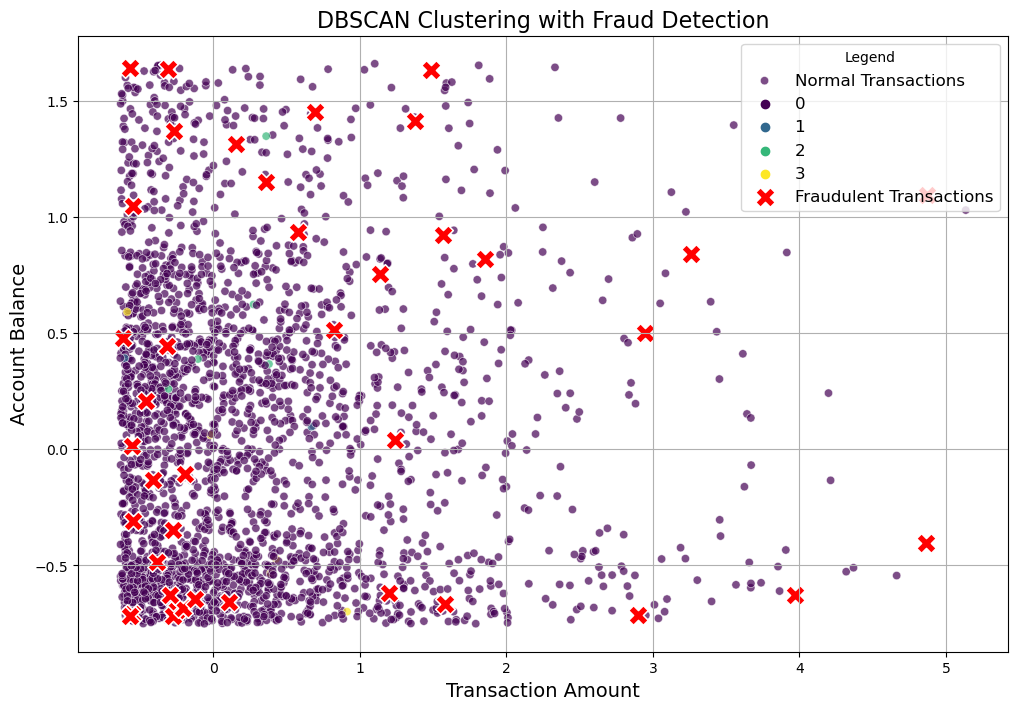

In [41]:
from sklearn.cluster import DBSCAN

# features chosen for DBSCAN fraud detection
features1 = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'TransactionType', 'AccountBalance', 'Location']

# making a copy of the features selected
transactions_dbscan_data = transactions_encoded[features1].copy()

# DBSCAN model
dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(transactions_dbscan_data)
transactions_dbscan_data['DBSCAN_Cluster'] = dbscan_labels

# the number of clusters found by DBSCAN
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

# setting all points assigned to cluster -1 to be a fraudulent transaction
transactions_dbscan_data['DBSCAN_Fraud'] = transactions_dbscan_data['DBSCAN_Cluster'] == -1

# setting all points as true to be fraud points
fraud_points = transactions_dbscan_data[transactions_dbscan_data['DBSCAN_Fraud'] == True]

# setting all points as false to be normal points
normal_points = transactions_dbscan_data[transactions_dbscan_data['DBSCAN_Fraud'] == False]

# producing a count of all true and false transactions
fraud_summary = transactions_dbscan_data['DBSCAN_Fraud'].value_counts()

# creating a scatter plot
plt.figure(figsize=(12, 8))

# scatter plot for normal transactions
sns.scatterplot(
    x='TransactionAmount', y='AccountBalance', 
    data=normal_points, hue='DBSCAN_Cluster', 
    palette='viridis', alpha=0.7, label='Normal Transactions'
)

# scatter plot for fraud transactions
sns.scatterplot(
    x='TransactionAmount', y='AccountBalance', 
    data=fraud_points, color='red', marker='X', 
    s=200, label='Fraudulent Transactions'
)


print(fraud_summary)

plt.title('DBSCAN Clustering with Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)
plt.show()

## ---------------

In [57]:
# visualsing k-means clustering with PCA's
# # Perform PCA for 2D visualization
# pca = PCA(n_components=2)
# data_2d = pca.fit_transform(transactions_kmeans_data)

# # Perform K-Means clustering
# kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# clusters = kmeans.fit_predict(data_2d)

# # Simulate anomaly detection (replace with your logic)
# distances = np.linalg.norm(data_2d - kmeans.cluster_centers_[clusters], axis=1)
# threshold = np.mean(distances) + 2.0 * np.std(distances)
# anomalies = np.where(distances > threshold)[0]

# # Visualize the clusters
# plt.figure(figsize=(10, 7))
# for cluster_id in np.unique(clusters):
#     plt.scatter(data_2d[clusters == cluster_id, 0], 
#                 data_2d[clusters == cluster_id, 1], 
#                 label=f"Cluster {cluster_id}", 
#                 s=50, alpha=0.7)

# # Highlight anomalies
# plt.scatter(data_2d[anomalies, 0], 
#             data_2d[anomalies, 1], 
#             color='red', 
#             label='Anomalies', 
#             s=100, edgecolors='black')

# # Add labels and legend
# plt.title("Clusters with Anomalies Highlighted")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()
# plt.grid(True)
# plt.show()

In [43]:
#  mean shift clustering
# from sklearn.cluster import MeanShift


# # After training the model, We store the
# # coordinates for the cluster centers
# ms = MeanShift()
# ms.fit(x_test_pca)
# cluster_centers = ms.cluster_centers_
  
# # Finally We plot the data points
# # and centroids in a 3D graph.
# fig = plt.figure()
 
# ax = fig.add_subplot(111)
 
# unique_labels = set(labels)
# colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
# ax.scatter(x_test_pca[:, 0], x_test_pca[:, 1], marker ='o')  # projection ='3d'
 
# ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker ='x', color ='red',
#            s = 300, linewidth = 5, zorder = 10)
 
# plt.show()

In [44]:
# # Select features for clustering
# features = ['TransactionAmount', 'TransactionDuration'] 
# X = transactions_encoded[features].copy()

# # Determine the optimal number of clusters using the Elbow Method
# inertia = []
# K = range(1, 10)  # Test for clusters from 1 to 10
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(transactions_encoded)
#     inertia.append(kmeans.inertia_)
    
# # Plot the Elbow Method
# plt.figure(figsize=(8, 5))
# plt.plot(K, inertia, 'bo-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal k')
# plt.show()

In [45]:
# from sklearn import metrics
# from sklearn.cluster import DBSCAN

# # mapping the clusters
# db = DBSCAN(eps=0.3, min_samples=10)
# clusters = db.fit_predict(x_test_pca)
# labels = db.labels_

# # calculating the explained variance
# explained_variance = pca.explained_variance_ratio_

# sil_score = silhouette_score(x_test_pca, clusters)

# print(f"Explained variance by each component: {explained_variance}")
# print(f"Total variance explained: {sum(explained_variance):.3f}")
# print(f"Silhouette score: {sil_score}")

# # creating cluster visualisation
# plt.figure(figsize=(8, 6))
# plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=clusters, cmap='viridis', s=50)
# plt.title('Clusters after PCA')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.show()

In [46]:
# kmeans clustering without pca
# from sklearn.metrics import silhouette_score

# # mapping the clusters
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# clusters = kmeans.fit_predict(x_test)
# sil_score = silhouette_score(x_test, clusters)

# # calculating the explained variance

# print(f"Silhouette score: {sil_score}")

# # creating cluster visualisation
# plt.figure(figsize=(8, 6))
# plt.scatter(x_test, c=clusters, cmap='viridis', s=50)
# plt.title('Clusters after PCA')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.colorbar(label='Cluster')
# plt.show()